In [1]:
# En el encabezado del script agregamos la ruta donde se encuentra el
# archivo map_plots.py que contienen las funciones para generar las figuras

import sys
sys.path.append('./..')
from map_plots import map_pcolor, map_quiver, add_quiverPlot

# Bibliotecas basicas para cargar datos de archivos netcdf y manipular los datos

import netCDF4 as nc 
import numpy as np


In [2]:
ncSrc = '../../gom-cicese-croco-phy-5km/data/gom-cicese-croco-phy-5km_clim_temperatura_promedio.nc'

dst = nc.Dataset(ncSrc, 'r')
dstLon = dst.variables['longitude'][:] 
dstLat = dst.variables['latitude'][:]
dstTime = nc.num2date(dst.variables['time'][:], dst.variables['time'].units) 

# La variable temp es 4D, solo seleccionamos el primer tiempo (enero), 
# y la primera profundidad (0 o superficie) 
dstTemp = dst.variables['temp'][0,0,:] 

dst.close()

In [3]:
# Listado de parametros que recibe la funcion map_pcolor

help(map_pcolor)

Help on function map_pcolor in module map_plots:

map_pcolor(loncoords, latcoords, zvar, title='', colorbar_label='', cmap='viridis', plot_land=True, plot_bathy=True, land_dataset='GSHHS', tickBins=4, extent=None, vmin=None, vmax=None, norm=None, colorbar_orientation='horizontal', crs=<cartopy.crs.PlateCarree object at 0x7fdace371170>)
    -
    Crea un gráfico tipo pcolormesh sobre un mapa, agrega linea de costas, lineas 
    batimetricas, marcadores de la malla lat,lon y devuelve la el objeto figura de 
    matplotlib
    
    Recibe variables de coordenadas longitud, latitud y magnitud a graficar
    
    Parametros requeridos:
     loncoords            - Arreglo ndarray 1D o 2D con variable de coordenadas 
                            longitud
     latcoords            - Arreglo ndarray 1D o 2D con variable de coordenadas 
                            latitud
     zvar                 - Arreglo ndarray 2D con variable a graficar.
    
    Parametros opcionales:
     title            

Text(0.02, 0.94, 'Enero')

/Users/hmedrano/anaconda3/envs/cartoplot/lib/python3.7/site-packages/shapefile.py:385: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


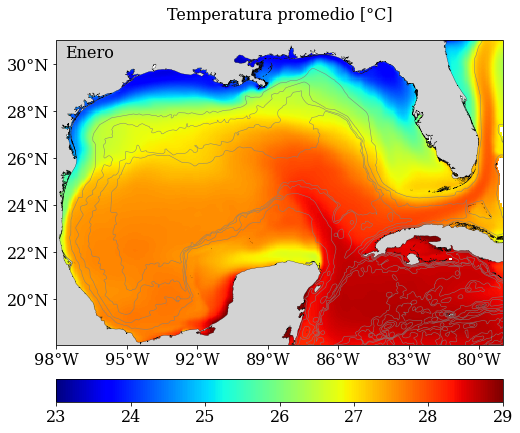

In [4]:
%matplotlib inline

ax, figure = map_pcolor(dstLon, dstLat, dstTemp, 
                        title='Temperatura promedio [°C]', 
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },
                        cmap='jet', 
                        plot_land=True, 
                        vmin=23.0, vmax=29.0)

# Si es necesario agregar leyendas
ax.annotate('Enero', xy=(0.02, 0.94), xycoords='axes fraction')

### Graficos de velocidad de corrientes

In [5]:
ncSrc = '../../gom-cicese-croco-phy-5km/data/gom-cicese-croco-phy-5km_clim_velocidad_promedio.nc'

dst = nc.Dataset(ncSrc, 'r')
dstLon = dst.variables['longitude'][:] 
dstLat = dst.variables['latitude'][:]
dstTime = nc.num2date(dst.variables['time'][:], dst.variables['time'].units) 

dstVariableU = dst.variables['u'][0,0,:] 
dstVariableV = dst.variables['v'][0,0,:] 
speed = np.sqrt(np.power(dstVariableU,2) + np.power(dstVariableV,2))

dst.close()

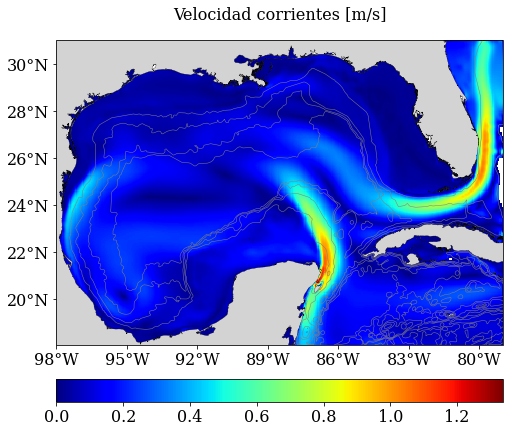

In [6]:
%matplotlib inline

ax, figure = map_pcolor(dstLon, dstLat, speed, 
                        title='Velocidad corrientes [m/s]', 
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },
                        cmap='jet', 
                        plot_land=True)

In [7]:
# Detalles sobre función que crea el grafico de mapa de vectores
# de velocidad

help(map_quiver)

Help on function map_quiver in module map_plots:

map_quiver(loncoords, latcoords, uvar, vvar, title='', slice_interval=8, quiverkeysize=None, quiverkeyunits='ms$^{-1}$)', quiverkeyposition={'x': 0.55, 'y': -0.08}, plot_land=True, plot_bathy=True, land_dataset='GSHHS', tickBins=4, extent=None, crs=<cartopy.crs.PlateCarree object at 0x7fdad0389230>)
    - 
    Crea un gráfico tipo quiver y quiverkey sobre un mapa, agrega linea de costas, lineas 
    batimetricas, marcadores de la malla lat,lon y devuelve la el objeto figura de 
    matplotlib
    
    Recibe variables de coordenadas longitud, latitud componente U y V a graficar
    Parametros requeridos:
     loncoords            - Arreglo ndarray 1D o 2D con variable de coordenadas 
                            longitud
     latcoords            - Arreglo ndarray 1D o 2D con variable de coordenadas 
                            latitud
     uvar                 - Arreglo ndarray 2D con el los componentes U del mapa de
                   

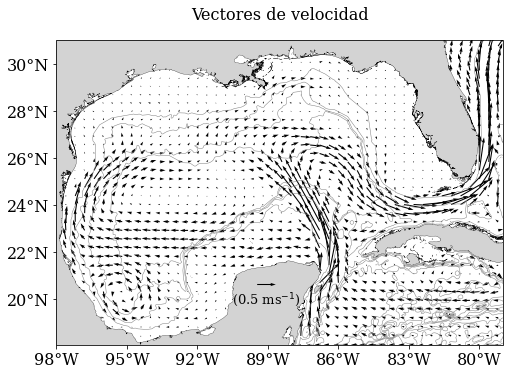

In [8]:
%matplotlib inline

ax, figure = map_quiver(dstLon, dstLat, dstVariableU, dstVariableV, 
                        title='Vectores de velocidad', 
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },
                        quiverkeyunits="ms$^{-1}$)",
                        quiverkeysize=.5,
                        quiverkeyposition={'x':.47, 'y': 0.2},
                        plot_land=True)

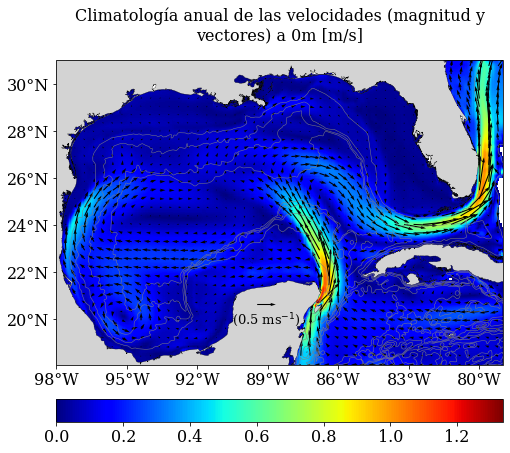

In [9]:
# Grafico pcolormesh con capa de mapa de vectores

ax, figure = map_pcolor(dstLon, dstLat, speed, 
                        title='Climatología anual de las velocidades (magnitud y vectores) a 0m [m/s]', 
                        tickBins={ 'x' : [-98,-95,-92,-89,-86,-83,-80], 
                                   'y' : [20,22,24,26,28,30] },
                        cmap='jet', 
                        plot_land=True)                                                      

# 
add_quiverPlot(ax, dstLon, dstLat, dstVariableU, dstVariableV,
               quiverkeyunits="ms$^{-1}$)",
               quiverkeysize=.5,
               quiverkeyposition={'x':.47, 'y': 0.2},)
